# Mapping migration

Introduction to vector data operations

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r

:::

### Identify the ecoregion for each observation

You can combine the ecoregions and the observations **spatially** using
a method called `.sjoin()`, which stands for spatial join.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Check out the <a
href="https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#spatial-joins"><code>geopandas</code>
documentation on spatial joins</a> to help you figure this one out. You
can also ask your favorite LLM (Large-Language Model, like ChatGPT)</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Perform a spatial join</div></div><div class="callout-body-container callout-body"><p>Identify the correct values for the <code>how=</code> and
<code>predicate=</code> parameters of the spatial join.</p></div></div>

In [2]:
gbif_ecoregion_gdf = (
    gdf
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(gbif_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        gbif_gdf,
        how='inner', 
        predicate='contains')

)
gbif_ecoregion_gdf

,name,area,geometry,gbifID,month
ecoregion_id,,,,,
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...",1699226958,NaN
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...",4852318020,5.0
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...",3902721213,8.0
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...",1698309817,NaN
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...",4145206315,7.0
...,...,...,...,...,...
79.0,Borneo montane rain forests,9.358407,"MULTIPOLYGON (((112.82394 -0.5066, 112.82298 -...",4892237566,6.0
376.0,Kinabalu montane alpine meadows,0.352694,"MULTIPOLYGON (((116.52616 6.11011, 116.52734 6...",4926272920,8.0
376.0,Kinabalu montane alpine meadows,0.352694,"MULTIPOLYGON (((116.52616 6.11011, 116.52734 6...",4994577355,11.0


### Count the observations in each ecoregion each month

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Group observations by ecoregion</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>columns_to_group_by</code> with a list of columns.
Keep in mind that you will end up with one row for each group – you want
to count the observations in each ecoregion by month.</li>
<li>Select only month/ecosystem combinations that have more than one
occurrence recorded, since a single occurrence could be an error.</li>
<li>Use the <code>.groupby()</code> and <code>.mean()</code> methods to
compute the mean occurrences by ecoregion and by month.</li>
<li>Run the code – it will normalize the number of occurrences by month
and ecoretion.</li>
</ol></div></div>

In [3]:
gbif_ecoregion_gdf

,name,area,geometry,gbifID,month
ecoregion_id,,,,,
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...",1699226958,NaN
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...",4852318020,5.0
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...",3902721213,8.0
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...",1698309817,NaN
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...",4145206315,7.0
...,...,...,...,...,...
79.0,Borneo montane rain forests,9.358407,"MULTIPOLYGON (((112.82394 -0.5066, 112.82298 -...",4892237566,6.0
376.0,Kinabalu montane alpine meadows,0.352694,"MULTIPOLYGON (((116.52616 6.11011, 116.52734 6...",4926272920,8.0
376.0,Kinabalu montane alpine meadows,0.352694,"MULTIPOLYGON (((116.52616 6.11011, 116.52734 6...",4994577355,11.0


In [4]:
occurrence_df = (
    gbif_ecoregion_gdf
    #Reset Index
    .reset_index()
    # For each ecoregion, for each month...
    .groupby(['ecoregion_id','month'])
    # ...count the number of occurrences
    .agg(
        occurrences=('gbifID','count'),
        area=('area','first')
        )
)
 



In [5]:

#Normalize by area
occurrence_df['density'] = occurrence_df.occurrences / occurrence_df.area

 # Get rid of rare observations (possible misidentification?)
occurrence_df = occurrence_df[occurrence_df.occurrences>1]

 # Take the mean by ecoregion
mean_occurrences_by_ecoregion = (
     occurrence_df
     .groupby('ecoregion_id')
     .mean()
 )


# Take the mean by month
mean_occurrences_by_month = (
    occurrence_df
     .groupby('month')
     .mean()
)

mean_occurrences_by_month

,occurrences,area,density
month,,,
1.0,48.908297,27.332519,3.133472
2.0,42.065789,25.877432,3.037704
3.0,41.334661,50.365087,2.946768
4.0,37.578358,50.439455,3.222524
5.0,45.583333,52.576478,3.192772
6.0,69.351111,57.533466,5.694876
7.0,54.618677,55.247231,5.646536
8.0,71.529915,60.048937,8.069064
9.0,62.184685,60.032716,6.916239


### Normalize the observations

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Normalize</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Divide occurrences by the mean occurrences by month AND the mean
occurrences by ecoregion</li>
</ol></div></div>

In [6]:
# Normalize by space and time for sampling effort
occurrence_df['norm_occurrences'] = (
    occurrence_df[['density']]
    / mean_occurrences_by_ecoregion[['density']]
    / mean_occurrences_by_month[['density']]
)
occurrence_df

occurrences       area   density  norm_occurrences
ecoregion_id month                                                    
3.0          1.0             14  13.844952  1.011199          0.439464
             2.0              6  13.844952  0.433371          0.194280
             3.0              8  13.844952  0.577828          0.267033
             4.0              8  13.844952  0.577828          0.244183
             5.0             17  13.844952  1.227884          0.523724
...                         ...        ...       ...               ...
839.0        12.0            16  35.905513  0.445614          0.123942
841.0        4.0              2   2.400003  0.833332          0.310316
842.0        1.0              2   1.640690  1.218999          0.319135
             11.0             2   1.640690  1.218999          0.232304
             12.0             2   1.640690  1.218999          0.249175

[2818 rows x 4 columns]

<Axes: xlabel='month', ylabel='norm_occurrences'>

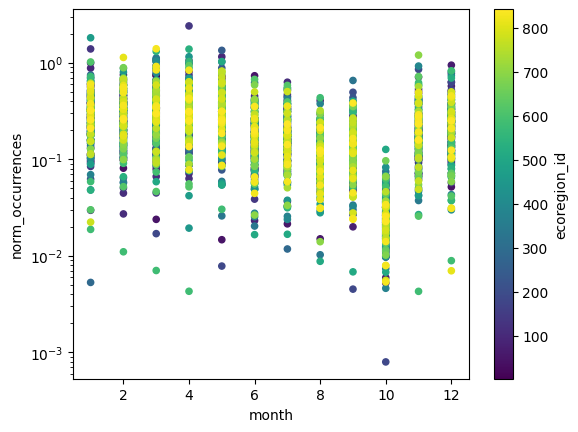

In [7]:
occurrence_df.reset_index().plot.scatter(
    x='month', y='norm_occurrences', c='ecoregion_id',
    logy=True
)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure to store the new version of your <code>DataFrame</code> for
other notebooks!</p>
<div id="f13606e9" class="cell" data-execution_count="9">
<div class="sourceCode" id="cb1"><pre
class="sourceCode python cell-code"><code class="sourceCode python"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="op">%</span>store occurrence_df</span></code></pre></div>
</div></div></div>

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [8]:
%store occurrence_df gbif_gdf

Stored 'occurrence_df' (DataFrame)
Stored 'gbif_gdf' (GeoDataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!